<a href="https://colab.research.google.com/github/DavidReal04/TalentoTech/blob/master/Taller_SQL_DavidReal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCCIÓN
Usaré esta notebook para proporcionar una introducción a SQL, lenguaje imprescindible para todo analista de datos.

Los sistemas gestores de bases de datos interpretan consultas escritas en lenguaje SQL, y así es como interactuamos y obtenemos datos de las bases de datos y aplicaciones.

SQL significa Structured Query Language (Lenguaje de consulta estructurado)
SQL permite acceder y manipular bases de datos
SQL es una herramienta simple para el análisis avanzado de datos
SQL no se usa sólo para manipular datos, sino también para administrar la misma base de datos, crear y modificar el diseño de objetos de la base de datos, como tablas. El elemento de SQL que se usa para crear y modificar objetos de base de datos se denomina lenguaje de definición de datos (DDL). Este curso no trata DDL.

En esta notebook veremos cómo trabajar/manipular tablas. Aprenderemos a usar SQL para interactuar con una base de datos de fútbol europeo y generar información interesante con sus datos.

La base de datos utilizada, pueder ser encontrada [aquí](https://www.kaggle.com/datasets/hugomathien/soccer)

Este ejercicio esta basado en el repositorio de (https://www.kaggle.com/code/gustavojaramillo/data-analysis-using-sql-espa-ol)

In [ ]:
# Importar librerías
import pandas as pd
import sqlite3 # SQLite

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Los datos de entrada están disponibles en el directorio "drive"
# Se sugiere establecer la conexión con su drive personal

path = "/content/drive/MyDrive/Colab Notebooks/DA_Talento/data/db/"

database = path + 'database.sqlite'

# Creamos la conexión con la BD y listaremos las tablas con las que contamos

conn = sqlite3.connect(database)
print ("Conexión exitosa")

print (database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

#Tarea: consultar que el * funcione para dataframe pandas

Conexión exitosa
/content/drive/MyDrive/Colab Notebooks/DA_Talento/data/db/database.sqlite


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [ ]:
query = 'SELECT * FROM \'Country\';'

countries = pd.read_sql(query, conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [ ]:
#Consulta todas las ligas del futbol europeo
query = """SELECT *
            FROM League; """

#No modificar lo siguiente:
leagues = pd.read_sql(query, conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [ ]:
#Consulta de los campos id,player_name, birthday, height y weight que estan en la tabla Player de la base de datos de Fútbol Europeo.
query = """SELECT id, player_name, birthday, height, weight FROM Player; """

#Creo una variable players_distinct que almacene los jugadores únicos
players = pd.read_sql(query, conn)
players

,id,player_name,birthday,height,weight
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
2,3,Aaron Doran,1991-05-13 00:00:00,170.18,163
3,4,Aaron Galindo,1982-05-08 00:00:00,182.88,198
4,5,Aaron Hughes,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...
11055,11071,Zoumana Camara,1979-04-03 00:00:00,182.88,168
11056,11072,Zsolt Laczko,1986-12-18 00:00:00,182.88,176
11057,11073,Zsolt Low,1979-04-29 00:00:00,180.34,154
11058,11074,Zurab Khizanishvili,1981-10-06 00:00:00,185.42,172


In [ ]:
#Consulta de solo los jugadores únicos de la tabla Player
query = """SELECT DISTINCT player_name FROM Player; """

#Creo una variable players_distinct que almacene los jugadores únicos
players_distinct = pd.read_sql(query, conn)
players_distinct

,player_name
0,Aaron Appindangoye
1,Aaron Cresswell
2,Aaron Doran
3,Aaron Galindo
4,Aaron Hughes
...,...
10843,Zoumana Camara
10844,Zsolt Laczko
10845,Zsolt Low
10846,Zurab Khizanishvili


In [ ]:
query = """SELECT DISTINCT season
           FROM Match;"""

seasons = pd.read_sql(query, conn)
seasons

#Las temporadas de análisis son 8, comprendidas entre los años 2008 y 2016

,season
0,2008/2009
1,2009/2010
2,2010/2011
3,2011/2012
4,2012/2013
5,2013/2014
6,2014/2015
7,2015/2016


In [ ]:
#Consulta de tasas diferentes de valoración general de los jugadores
query = """SELECT DISTINCT overall_rating FROM Player_Attributes; """

overall_rating = pd.read_sql(query, conn)
overall_rating

,overall_rating
0,67.0
1,62.0
2,61.0
3,74.0
4,73.0
...,...
57,33.0
58,36.0
59,37.0
60,35.0


In [ ]:
#listar 25 equipos del fútbol europeo.
#La tabla de resultados deberá contener los campos id y team_long_name de la tabla Team de la base de datos de Fútbol Europeo.
query = """
            SELECT id, team_long_name
            FROM Team
            LIMIT 25;
        """

#No modificar lo siguiente:
teams = pd.read_sql(query, conn)
teams

,id,team_long_name
0,1,KRC Genk
1,2,Beerschot AC
2,3,SV Zulte-Waregem
3,4,Sporting Lokeren
4,5,KSV Cercle Brugge
5,6,RSC Anderlecht
6,7,KAA Gent
7,8,RAEC Mons
8,9,FCV Dender EH
9,10,Standard de Liège


In [ ]:
#Relación de Tablas

query = """SELECT L.id AS Id_Liga, L.name AS Nombre_Liga, C.name AS Pais
            FROM League AS L
            JOIN Country AS C ON C.id = L.country_id; """

country_leagues = pd.read_sql(query, conn)
country_leagues

,Id_Liga,Nombre_Liga,Pais
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [ ]:
#Traer el número de etapas stage almacenados en la tabla Match de la base de datos de Fútbol Europeo.
query = """
            SELECT COUNT(DISTINCT stage) AS Num_Etapas
            FROM Match;
        """

#No modificar lo siguiente:
countdis_stages = pd.read_sql(query, conn)
countdis_stages

,Num_Etapas
0,38


In [ ]:
 #traer la suma de goles hechos por los equipos visitantes away_team_goal almacenados en la tabla Match de la base de datos de Fútbol Europeo
query = """
            SELECT SUM(away_team_goal) AS Suma_Goles_Visitantes
            FROM Match;
        """
#No modificar lo siguiente:
sum_awayteam = pd.read_sql(query, conn)
sum_awayteam

,Suma_Goles_Visitantes
0,30160


In [ ]:
# traer el promedio de goles hechos por los equipos locales home_team_goal y el promedio de goles hechos por los equipos visitantes away_team_goal almacenados en la tabla Match de la base de datos de Fútbol Europeo
query = """
            SELECT AVG(home_team_goal) AS Promedio_Goles_Locales, AVG(away_team_goal) AS Promedio_Goles_Visitantes
            FROM Match;
        """
#No modificar lo siguiente:
avg_teamgoals = pd.read_sql(query, conn)
avg_teamgoals

,Promedio_Goles_Locales,Promedio_Goles_Visitantes
0,1.544594,1.160938


In [ ]:
#traer la máxima cantidad de goles un equipo visitante away_team_goal almacenados en la tabla Match de la base de datos de Fútbol Europeo.
query = """
            SELECT MAX(away_team_goal) AS Maximo_Goles_Visitantes
            FROM Match;
        """
#No modificar lo siguiente:
max_teamgoals = pd.read_sql(query, conn)
max_teamgoals

,Maximo_Goles_Visitantes
0,9


In [ ]:
#traer el promedio de la suma de goles hechos por los equipos locales home_team_goal y visitantes away_team_goal en todos los juegos almacenados en la tabla Match de la base de datos de Fútbol Europeo.
query = """
            SELECT AVG(home_team_goal + away_team_goal) AS Promedio_Suma_Goles
            FROM Match;
        """

#No modificar lo siguiente:
avg_sum_goals = pd.read_sql(query, conn)
avg_sum_goals

,Promedio_Suma_Goles
0,2.705531


In [ ]:
# listar las temporadas en que algún equipo visitante haya anotado 7 o más goles. La tabla de resultados deberá contener los campos season, home_team_goal, away_team_goal de la tabla Match de la base de datos de Fútbol Europeo.
query = """
            SELECT season, home_team_goal, away_team_goal
            FROM Match
            WHERE away_team_goal >= 7;
        """
#No modificar lo siguiente:
away_team_goals = pd.read_sql(query, conn)
away_team_goals

,season,home_team_goal,away_team_goal
0,2012/2013,1,7
1,2014/2015,1,7
2,2014/2015,2,7
3,2015/2016,0,9
4,2010/2011,1,8
5,2013/2014,0,7
6,2010/2011,0,7
7,2013/2014,0,7
8,2010/2011,0,8
9,2011/2012,0,7


In [ ]:
#Traer el Id de los equipos que desarrollan un dribbling normal y su velocidad de juego es balanceada
query="""
        SELECT id,buildUpPlayDribblingClass, buildUpPlaySpeedClass
        FROM Team_Attributes
        WHERE buildUpPlayDribblingClass = 'Normal' AND buildUpPlaySpeedClass = 'Balanced';
      """
#No modificar lo siguiente:
team_att_and = pd.read_sql(query, conn)
team_att_and

,id,buildUpPlayDribblingClass,buildUpPlaySpeedClass
0,2,Normal,Balanced
1,3,Normal,Balanced
2,8,Normal,Balanced
3,9,Normal,Balanced
4,14,Normal,Balanced
...,...,...,...
382,1450,Normal,Balanced
383,1451,Normal,Balanced
384,1452,Normal,Balanced
385,1457,Normal,Balanced


In [ ]:
#Traer el Id de los equipos que desarrollan un juego de pase largo o su velocidad de juego es rápida
query="""
        SELECT id, buildUpPlayPassingClass, buildUpPlaySpeedClass
        FROM Team_Attributes
        WHERE buildUpPlayPassingClass = 'Long' OR buildUpPlaySpeedClass = 'Fast';
      """

#No modificar lo siguiente:
team_att_or = pd.read_sql(query, conn)
team_att_or

,id,buildUpPlayPassingClass,buildUpPlaySpeedClass
0,4,Long,Fast
1,42,Long,Balanced
2,69,Mixed,Fast
3,72,Mixed,Fast
4,77,Mixed,Fast
...,...,...,...
226,1420,Mixed,Fast
227,1421,Long,Fast
228,1423,Long,Fast
229,1436,Long,Balanced


In [ ]:
#Traer la tabla de países sin Bélgica
query="""
        SELECT *
        FROM Country
        WHERE name != 'Belgium';
      """

#No modificar lo siguiente:
countries_not = pd.read_sql(query, conn)
countries_not

,id,name
0,1729,England
1,4769,France
2,7809,Germany
3,10257,Italy
4,13274,Netherlands
5,15722,Poland
6,17642,Portugal
7,19694,Scotland
8,21518,Spain
9,24558,Switzerland


In [ ]:
#Traer la tabla de países únicamente con Italia
query="""
        SELECT *
        FROM Country
        WHERE name = 'Italy';
      """

#No modificar lo siguiente:
countries_equal = pd.read_sql(query, conn)
countries_equal

,id,name
0,10257,Italy


In [ ]:
#Traer la tabla de países sin Polonia. Sin NOT
query="""
        SELECT *
        FROM Country
        WHERE name != 'Poland';
      """

#No modificar lo siguiente:
countries_dif = pd.read_sql(query, conn)
countries_dif

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,17642,Portugal
7,19694,Scotland
8,21518,Spain
9,24558,Switzerland


In [ ]:
#Listar los jugadores que pesen entre 174 y 176 libras
query="""
        SELECT id, player_name, birthday, height, weight
        FROM Player
        WHERE weight BETWEEN 174 AND 176 LIMIT 30;
      """

#No modificar lo siguiente:
players_weight = pd.read_sql(query, conn)
players_weight

,id,player_name,birthday,height,weight
0,17,Aaron Taylor-Sinclair,1991-04-08 00:00:00,182.88,176
1,34,Abdou Traore,1988-01-17 00:00:00,180.34,174
2,39,Abdoulaye Ba,1991-01-01 00:00:00,198.12,174
3,43,Abdoulaye Diallo,1992-03-30 00:00:00,187.96,174
4,61,Abel Aguilar,1985-01-06 00:00:00,185.42,176
5,68,Abella Perez Damia,1982-04-15 00:00:00,187.96,174
6,74,Abraham Gonzalez,1985-07-16 00:00:00,177.80,176
7,79,Achille Coser,1982-07-14 00:00:00,185.42,174
8,89,Adam Banas,1982-12-25 00:00:00,185.42,174
9,90,Adam Bodzek,1985-09-07 00:00:00,182.88,174


In [ ]:
#Listar a los Messi de la base de datos de jugadores
query="""
        SELECT id, player_name, birthday, height, weight
        FROM Player
        WHERE player_name LIKE '%Messi%';
      """

#No modificar lo siguiente:
players_messi = pd.read_sql(query, conn)
players_messi

,id,player_name,birthday,height,weight
0,6176,Lionel Messi,1987-06-24 00:00:00,170.18,159


In [ ]:
#Ejemplo: Listar a los equipos y ordenarlos por nombre
query = """SELECT id, team_long_name AS team_name
        FROM Team
        ORDER BY team_long_name ASC
        LIMIT 250;"""
teams_orderby = pd.read_sql(query, conn)
teams_orderby

,id,team_name
0,16848,1. FC Kaiserslautern
1,15624,1. FC Köln
2,16239,1. FC Nürnberg
3,16243,1. FSV Mainz 05
4,11817,AC Ajaccio
...,...,...
245,6504,Southampton
246,18079,SpVgg Greuther Fürth
247,26559,Sparta Rotterdam
248,35285,Sporting CP


In [ ]:
#Listar la tabla de países en orden descendente
query="""
        SELECT id, name
        FROM Country
        ORDER BY name DESC;
      """

#No modificar lo siguiente:
teams_orderdesc = pd.read_sql(query, conn)
teams_orderdesc

,id,name
0,24558,Switzerland
1,21518,Spain
2,19694,Scotland
3,17642,Portugal
4,15722,Poland
5,13274,Netherlands
6,10257,Italy
7,7809,Germany
8,4769,France
9,1729,England


In [ ]:
#Listar el id de los 15 jugadores con menos peso
query="""
        SELECT id, player_name, weight
        FROM Player
        ORDER BY weight ASC
        LIMIT 15;
      """

#No modificar lo siguiente:
player_weightasc = pd.read_sql(query, conn)
player_weightasc

,id,player_name,weight
0,5453,Juan Quero,117
1,6853,Mariusz Rybicki,121
2,10954,Yohandry Orozco,121
3,1480,Caetano,123
4,2612,Diego Buonanotte,123
5,317,Aldo Kalulu,126
6,655,Andre Horta,126
7,3446,Fouad Rachid,126
8,7258,Maxi Moralez,126
9,7264,Maxime Blanc,126


In [ ]:
#Listar el id de los 10 jugadores con mayor estatura
query="""
        SELECT id, player_name, height
        FROM Player
        ORDER BY height DESC
        LIMIT 10;
      """

#No modificar lo siguiente:
player_heightdesc = pd.read_sql(query, conn)
player_heightdesc

,id,player_name,height
0,5908,Kristof van Hout,208.28
1,1301,Bogdan Milic,203.20
2,1926,Costel Pantilimon,203.20
3,3274,Fejsal Mulic,203.20
4,5568,Jurgen Wevers,203.20
5,5804,Kevin Vink,203.20
6,5957,Lacina Traore,203.20
7,8016,Nikola Zigic,203.20
8,8285,Paolo Acerbis,203.20
9,8638,Pietro Marino,203.20


In [ ]:
#Listar el id de los 10 jugadores con mayor estatura y ordenarlos alfabéticamente pero de forma descendente
query="""
        SELECT id, player_name, height
        FROM Player
        ORDER BY height DESC, player_name DESC
        LIMIT 10;
      """

#No modificar lo siguiente:
player_height_name = pd.read_sql(query, conn)
player_height_name

,id,player_name,height
0,5908,Kristof van Hout,208.28
1,11043,Zeljko Kalac,203.20
2,10574,Vanja Milinkovic-Savic,203.20
3,9916,Stefan Maierhofer,203.20
4,8638,Pietro Marino,203.20
5,8285,Paolo Acerbis,203.20
6,8016,Nikola Zigic,203.20
7,5957,Lacina Traore,203.20
8,5804,Kevin Vink,203.20
9,5568,Jurgen Wevers,203.20


In [ ]:
#Queremos conocer cuántos equipos tienen cada clase de juego defensivo
query="""
        SELECT defencePressureClass, COUNT(*) AS Num_Equipos
        FROM Team_Attributes
        GROUP BY defencePressureClass;
      """

#No modificar lo siguiente:
teams_defence = pd.read_sql(query, conn)
teams_defence

,defencePressureClass,Num_Equipos
0,Deep,154
1,High,61
2,Medium,1243


In [ ]:
#Analítica básica de las temporadas
query = """
        SELECT season, COUNT(stage) as number_of_stages,
         AVG(home_team_goal) as avg_home_team_goals, AVG(away_team_goal) as avg_away_team_goals,
         SUM(home_team_goal+away_team_goal) as total_goals
        FROM Match
        GROUP BY season
        ORDER BY season DESC;
        """

#No modificar lo siguiente:
stages_by_season = pd.read_sql(query, conn)
stages_by_season

,season,number_of_stages,avg_home_team_goals,avg_away_team_goals,total_goals
0,2015/2016,3326,1.543897,1.210764,9162
1,2014/2015,3325,1.520301,1.155489,8897
2,2013/2014,3032,1.578826,1.187995,8389
3,2012/2013,3260,1.550000,1.222699,9039
4,2011/2012,3220,1.572671,1.143789,8747
5,2010/2011,3260,1.548466,1.135276,8749
6,2009/2010,3230,1.541176,1.131269,8632
7,2008/2009,3326,1.505412,1.101924,8672


In [ ]:
#Comparación de cantidad de partidos jugados en cierta temporada de España y Bélgica
query = """
        SELECT season, C.name AS country_name, COUNT(*) AS count_matches
        FROM Match AS M
        LEFT JOIN Country AS C ON C.id = M.country_id
        WHERE season='2008/2009' AND country_name IN ('Spain', 'Belgium')
        GROUP BY country_name
        ORDER BY count_matches DESC;
        """

#No modificar lo siguiente:
country_matches = pd.read_sql(query, conn)
country_matches

,season,country_name,count_matches
0,2008/2009,Spain,380
1,2008/2009,Belgium,306


In [ ]:
# Lista detallada de juegos 10 juegos realizados en el país Spain, ordenado de forma ascendente por date.
query = """
        SELECT M.id, C.name as country_name, L.name as league_game, M.season, M.stage, M.date, M.home_team_api_id,
         Th.team_long_name as home_team, Ta.team_long_name as away_team, home_team_goal, away_team_goal
        FROM Match AS M
        JOIN Country    as C  ON C.id = M.country_id
        JOIN League     as L  ON L.id = M.league_id
        LEFT JOIN Team  as Th  ON Th.team_api_id = M.home_team_api_id
        LEFT JOIN Team  as Ta  ON Ta.team_api_id = M.away_team_api_id
        WHERE C.name = 'Spain'
        ORDER BY date ASC
        LIMIT 10;
        """

#No modificar lo siguiente:
detailed_matches = pd.read_sql(query, conn)
detailed_matches

,id,country_name,league_game,season,stage,date,home_team_api_id,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,10267,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,8558,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,8371,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,9783,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,8388,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,8696,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,9869,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,8603,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,8315,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,9906,Atlético Madrid,Málaga CF,4,0


In [ ]:
#Análisis de goles por temporada en las ligas de España, Francia e Inglaterra.

query = """SELECT season,
            Country.name AS Country,
            League.name AS League,
            ROUND(AVG(Match.home_team_goal),2) AS avg_local_goals,
            ROUND(AVG(Match.away_team_goal),2) AS avg_visitor_goals,
            SUM(home_team_goal+away_team_goal) AS total_goals
        FROM Match
        JOIN Country ON Country.id = Match.country_id
        JOIN League ON League.id = Match.league_id
        WHERE Country.name IN ('Spain', 'France', 'England')
        GROUP BY season, League
        HAVING avg_local_goals BETWEEN 1.4 AND 1.6 AND avg_visitor_goals BETWEEN 1.2 AND 1.6
        ORDER BY season DESC;"""

goals_by_season = pd.read_sql(query, conn)
goals_by_season

,season,Country,League,avg_local_goals,avg_visitor_goals,total_goals
0,2015/2016,England,England Premier League,1.49,1.21,1026
1,2012/2013,England,England Premier League,1.56,1.24,1063
2,2011/2012,England,England Premier League,1.59,1.22,1066


In [ ]:
#Nos basaremos en ejemplo "Lista detallada de juegos", pero eliminaremos la información del partido y fechas, para comparar las ligas por temporadas.
#Análisis de goles por temporada en las ligas de España, Francia e Inglaterra.
"""
Para las ligas de los paises Spain, Germany, France, Italy y England que tengan un promedio de goles por partido mayor a 2.5, queremos conocer:

El nombre del país del equipo como Country,
El nombre de la liga en la que juega como League,
La cantidad de partidos (stages) como Stages,
La temporada como Season,
La cantidad de equipos como number_of_teams,
El promedio de goles realizados por los equipos locales como avg_local_goals,redondeando con 2 decimales,
El promedio de goles realizados por los equipos visitantes como avg_visitor_goals,redondeando con 2 decimales,
El promedio de goles por partido como avg_goals,redondeando con 2 decimales,
El promedio de gol diferencia por partido como avg_goal_dif,redondeando con 2 decimales,
El total de goles realizados en la temporada como total_goals"""

query = """SELECT season,
            Country.name AS Country,
            League.name AS League,
            stage AS Stages, season AS Season,
            count(DISTINCT home_team_api_id) AS number_of_teams,
            ROUND(AVG(Match.home_team_goal),2) AS avg_local_goals,
            ROUND(AVG(Match.away_team_goal),2) AS avg_visitor_goals,
            ROUND(AVG(Match.home_team_goal + Match.away_team_goal),2) AS avg_goals,
            ROUND(AVG(Match.home_team_goal - Match.away_team_goal),2) AS avg_goal_dif,
            SUM(home_team_goal+away_team_goal) AS total_goals
        FROM Match
        JOIN Country ON Country.id = Match.country_id
        JOIN League ON League.id = Match.league_id
        JOIN Team ON Team.team_api_id = Match.home_team_api_id
        WHERE Country.name IN ('Spain', 'France', 'Italy','England')
        GROUP BY season, League
        HAVING avg_goals > 2.5
        ORDER BY season DESC;"""

leagues_by_season = pd.read_sql(query, conn)
leagues_by_season


,season,Country,League,Stages,Season,number_of_teams,avg_local_goals,avg_visitor_goals,avg_goals,avg_goal_dif,total_goals
0,2015/2016,England,England Premier League,1,2015/2016,20,1.49,1.21,2.70,0.28,1026
1,2015/2016,France,France Ligue 1,1,2015/2016,20,1.44,1.09,2.53,0.35,960
2,2015/2016,Italy,Italy Serie A,1,2015/2016,20,1.47,1.11,2.58,0.37,979
3,2015/2016,Spain,Spain LIGA BBVA,1,2015/2016,20,1.62,1.13,2.74,0.49,1043
4,2014/2015,England,England Premier League,1,2014/2015,20,1.47,1.09,2.57,0.38,975
5,2014/2015,Italy,Italy Serie A,1,2014/2015,20,1.50,1.19,2.69,0.31,1018
6,2014/2015,Spain,Spain LIGA BBVA,1,2014/2015,20,1.54,1.12,2.66,0.42,1009
7,2013/2014,England,England Premier League,1,2013/2014,20,1.57,1.19,2.77,0.38,1052
8,2013/2014,Italy,Italy Serie A,1,2013/2014,20,1.54,1.19,2.72,0.35,1035
9,2013/2014,Spain,Spain LIGA BBVA,1,2013/2014,20,1.63,1.12,2.75,0.51,1045


In [ ]:
#Análisis sobre los equipos que más goles realizaron jugando como locales
"""
Queremos un detalle de los equipos que jugando como locales en las ligas de Spain, Germany y England, hayan anotado más de 50 goles. Ordenar de forma descendente por temporada y por equipo con más goles realizados. Nos interesa conocer:

El nombre del país del equipo como Country
El nombre de la liga en la que juega como League
El nombre del equipo como Team
La cantidad de partidos (stages) como Stages
La temporada como Season
La suma de goles realizados en esa temporada, jugando como local bajo el alias sum_goals
El promedio de goles bajo alias avg_goals, redondeando con 2 decimales
"""

query = """SELECT season AS Season,
            Count(stage) AS Stages,
            Country.name AS Country,
            League.name AS League,
            Team.team_long_name AS Team,
            SUM(home_team_goal) AS sum_goals,
            ROUND(AVG(home_team_goal),2) AS avg_goals
        FROM Match
        JOIN Country ON Country.id = Match.country_id
        JOIN League ON League.id = Match.league_id
        JOIN Team ON Team.team_api_id = Match.home_team_api_id
        WHERE Country.name IN ('Spain', 'Germany', 'England')
        GROUP BY Season, League, Team
        HAVING sum_goals > 50
        ORDER BY Season DESC, sum_goals DESC;"""

#No modificar lo siguiente:
teams_by_season = pd.read_sql(query, conn)
teams_by_season

,Season,Stages,Country,League,Team,sum_goals,avg_goals
0,2015/2016,19,Spain,Spain LIGA BBVA,Real Madrid CF,70,3.68
1,2015/2016,19,Spain,Spain LIGA BBVA,FC Barcelona,67,3.53
2,2015/2016,17,Germany,Germany 1. Bundesliga,FC Bayern Munich,51,3.00
3,2014/2015,19,Spain,Spain LIGA BBVA,Real Madrid CF,65,3.42
4,2014/2015,19,Spain,Spain LIGA BBVA,FC Barcelona,64,3.37
5,2013/2014,19,Spain,Spain LIGA BBVA,FC Barcelona,64,3.37
6,2013/2014,19,England,England Premier League,Manchester City,63,3.32
7,2013/2014,19,Spain,Spain LIGA BBVA,Real Madrid CF,63,3.32
8,2013/2014,19,England,England Premier League,Liverpool,53,2.79
9,2012/2013,19,Spain,Spain LIGA BBVA,Real Madrid CF,67,3.53


In [ ]:
#Análisis del cambio en overall rating y potential de Cristiano Ronaldo por edad.
query = """
        SELECT player_name, Date(date)-Date(Birthday) as Edad, overall_rating, potential, DATE(date) as Rating_Date
        FROM Player_Attributes
        JOIN Player ON Player.player_api_id = Player_Attributes.player_api_id
        WHERE player_name = 'Cristiano Ronaldo'
        ORDER BY Edad;
        """


#No modificar lo siguiente:
ratingCristiano = pd.read_sql(query, conn)
ratingCristiano

,player_name,Edad,overall_rating,potential,Rating_Date
0,Cristiano Ronaldo,22,91,94,2007-08-30
1,Cristiano Ronaldo,22,87,92,2007-02-22
2,Cristiano Ronaldo,23,91,94,2008-08-30
3,Cristiano Ronaldo,24,89,94,2009-08-30
4,Cristiano Ronaldo,24,90,94,2009-02-22
5,Cristiano Ronaldo,25,89,94,2010-08-30
6,Cristiano Ronaldo,25,89,93,2010-02-22
7,Cristiano Ronaldo,26,92,94,2011-08-30
8,Cristiano Ronaldo,26,89,93,2011-02-22
9,Cristiano Ronaldo,27,92,94,2012-08-31


In [ ]:
#Queremos una tabla que me indique los partidos jugados por el FC Barcelona, su rival, la fecha de juego y si perdió, ganó o empato.
query= """SELECT DATE(Match.date) as MatchDate,
                Home.team_long_name AS  HomeTeam,
                home_team_goal AS Home_goals,
                Visitor.team_long_name AS VisitorTeam,
                away_team_goal Visitor_goals,
                CASE
                    WHEN Home.team_api_id = 8634 AND home_team_goal < away_team_goal THEN 'Barca lost :('
                    WHEN Home.team_api_id = 8634 AND home_team_goal > away_team_goal THEN 'Barca won'
                    WHEN Visitor.team_api_id = 8634 AND home_team_goal < away_team_goal THEN 'Barca won'
                    WHEN Visitor.team_api_id = 8634 AND home_team_goal > away_team_goal THEN 'Barca lost :('
                    ELSE 'Tie'
                END AS Outcome
        FROM Match
        LEFT JOIN Team AS Home on Home.team_api_id = Match.home_team_api_id
        LEFT JOIN Team AS Visitor on Visitor.team_api_id = Match.away_team_api_id
        WHERE (Visitor.team_api_id = 8634 OR Home.team_api_id = 8634) AND season = "2012/2013"
        Order by MatchDate DESC
        LIMIT 15;"""

Barca_results = pd.read_sql(query, conn)
Barca_results

,MatchDate,HomeTeam,Home_goals,VisitorTeam,Visitor_goals,Outcome
0,2013-06-01,FC Barcelona,4,Málaga CF,1,Barca won
1,2013-05-26,RCD Espanyol,0,FC Barcelona,2,Barca won
2,2013-05-19,FC Barcelona,2,Real Valladolid,1,Barca won
3,2013-05-12,Atlético Madrid,1,FC Barcelona,2,Barca won
4,2013-05-05,FC Barcelona,4,Real Betis Balompié,2,Barca won
5,2013-04-27,Athletic Club de Bilbao,2,FC Barcelona,2,Tie
6,2013-04-20,FC Barcelona,1,Levante UD,0,Barca won
7,2013-04-14,Real Zaragoza,0,FC Barcelona,3,Barca won
8,2013-04-06,FC Barcelona,5,RCD Mallorca,0,Barca won
9,2013-03-30,RC Celta de Vigo,2,FC Barcelona,2,Tie


In [ ]:
#Queremos una tabla que me indique los partidos jugados por el FC Barcelona como local contra el Real Madrid CF, la fecha de juego y si perdió, ganó o empató.
query= """SELECT DATE(Match.date) as MatchDate,
                Home.team_long_name AS  HomeTeam,
                home_team_goal AS Home_goals,
                Visitor.team_long_name AS VisitorTeam,
                away_team_goal Visitor_goals,
                CASE
                    WHEN Home.team_api_id = 8634 AND Visitor.team_api_id = 8633 AND home_team_goal < away_team_goal THEN 'Barca lost :('
                    WHEN Home.team_api_id = 8634 AND Visitor.team_api_id = 8633 AND home_team_goal > away_team_goal THEN 'Barca won'
                    ELSE 'Tie'
                END AS Outcome
        FROM Match
        LEFT JOIN Team AS Home on Home.team_api_id = Match.home_team_api_id
        LEFT JOIN Team AS Visitor on Visitor.team_api_id = Match.away_team_api_id
        WHERE (Visitor.team_api_id = 8633 AND Home.team_api_id = 8634)
        Order by MatchDate DESC
        LIMIT 15;"""

#No modificar lo siguiente:
BarcaMadrid_results = pd.read_sql(query, conn)
BarcaMadrid_results

,MatchDate,HomeTeam,Home_goals,VisitorTeam,Visitor_goals,Outcome
0,2016-04-02,FC Barcelona,1,Real Madrid CF,2,Barca lost :(
1,2015-03-22,FC Barcelona,2,Real Madrid CF,1,Barca won
2,2013-10-26,FC Barcelona,2,Real Madrid CF,1,Barca won
3,2012-10-07,FC Barcelona,2,Real Madrid CF,2,Tie
4,2012-04-21,FC Barcelona,1,Real Madrid CF,2,Barca lost :(
5,2010-11-29,FC Barcelona,5,Real Madrid CF,0,Barca won
6,2009-11-29,FC Barcelona,1,Real Madrid CF,0,Barca won
7,2008-12-13,FC Barcelona,2,Real Madrid CF,0,Barca won


In [ ]:
#Rating de Cristiano Ronaldo y Lionel Messi versus los demás jugadores.
query = """SELECT CASE
                   WHEN player_name = 'Cristiano Ronaldo' THEN 'Cristiano Ronaldo'
                   WHEN player_name = 'Lionel Messi' THEN 'Lionel Messi'
                   ELSE 'Others'
                   END AS Player,
           PA_Grouped.avg_overall_rating AS avg_overall_rating,
           PA_Grouped.avg_potential AS avg_potential
           FROM Player
           LEFT JOIN
                    (SELECT Player_Attributes.player_api_id,
                         ROUND(avg(Player_Attributes.overall_rating),2) AS avg_overall_rating,
                         ROUND(avg(Player_Attributes.potential),2) AS avg_potential
                     FROM Player_Attributes
                     GROUP BY Player_Attributes.player_api_id)
                    AS PA_Grouped
           ON Player.player_api_id = PA_Grouped.player_api_id
           GROUP BY Player
           ORDER BY Player;"""

players_rating = pd.read_sql(query, conn)
players_rating

,Player,avg_overall_rating,avg_potential
0,Cristiano Ronaldo,91.28,93.48
1,Lionel Messi,92.19,95.23
2,Others,63.60,67.60


In [ ]:
#Comparación de tipo de juego entre el FC Barcelona y Real Madrid FC - SUB QUERY
query="""
      SELECT
    ta.date AS RatingDate,
    t.team_api_id AS TeamID,
    t.team_long_name AS Team,
    CASE
        WHEN ta.buildUpPlaySpeed >= 70 THEN 'Fast'
        WHEN ta.buildUpPlaySpeed <= 30 THEN 'Slow'
        ELSE 'Balanced'
    END AS PlaySpeed,
    CASE
        WHEN ta.buildUpPlayPassing >= 70 THEN 'Long'
        WHEN ta.buildUpPlayPassing <= 30 THEN 'Short'
        ELSE 'Mixed'
    END AS PlayPassing,
    CASE
        WHEN ta.chanceCreationShooting >= 68 THEN 'Lots'
        WHEN ta.chanceCreationShooting <= 30 THEN 'Little'
        ELSE 'Normal'
    END AS CreationShooting
FROM
    Team_Attributes ta
JOIN
    (Select team_api_id, team_long_name From Team WHERE team_long_name IN ('FC Barcelona', 'Real Madrid CF')) as t
ON
    ta.team_api_id = t.team_api_id
GROUP BY
    ta.date,
    t.team_api_id,
    t.team_long_name;
      """

#No modificar lo siguiente:
subquery = pd.read_sql(query, conn)
subquery

,RatingDate,TeamID,Team,PlaySpeed,PlayPassing,CreationShooting
0,2010-02-22 00:00:00,8633,Real Madrid CF,Balanced,Short,Lots
1,2010-02-22 00:00:00,8634,FC Barcelona,Balanced,Short,Lots
2,2011-02-22 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Normal
3,2011-02-22 00:00:00,8634,FC Barcelona,Balanced,Mixed,Lots
4,2012-02-22 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots
5,2012-02-22 00:00:00,8634,FC Barcelona,Slow,Short,Normal
6,2013-09-20 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots
7,2013-09-20 00:00:00,8634,FC Barcelona,Balanced,Mixed,Normal
8,2014-09-19 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots
9,2014-09-19 00:00:00,8634,FC Barcelona,Balanced,Mixed,Normal


In [ ]:
#Lista de Maximos Goleadores del FC Barcelona
query = """
SELECT
    p.player_name AS Player,
    SUM(m.home_team_goal + m.away_team_goal) AS Goals
FROM
    Match m
JOIN
    Player p ON p.player_api_id = m.home_player_10 OR p.player_api_id = m.away_player_10
JOIN
    Team t ON t.team_api_id = m.home_team_api_id OR t.team_api_id = m.away_team_api_id
WHERE
    t.team_long_name = 'FC Barcelona'
GROUP BY
    p.player_name
ORDER BY
    Goals DESC
LIMIT 3;
"""

lista_maximos = pd.read_sql(query, conn)
lista_maximos


,Player,Goals
0,Lionel Messi,487
1,Luis Suarez,198
2,Samuel Eto'o,121


In [ ]:
#¿Qué equipo tuvo el mejor rendimiento como local en la temporada 2015/2016 de la liga española?
query = """
SELECT
    t.team_long_name AS Team,
    SUM(CASE
        WHEN m.home_team_goal > m.away_team_goal THEN 3
        WHEN m.home_team_goal = m.away_team_goal THEN 1
        ELSE 0
    END) AS Home_Points
FROM
    Match m
JOIN
    Team t ON t.team_api_id = m.home_team_api_id
JOIN
    League l ON l.country_id = m.country_id
WHERE
    l.name = 'Spain LIGA BBVA'
    AND m.season = '2015/2016'
GROUP BY
    t.team_long_name
ORDER BY
    Home_Points DESC
LIMIT 5;
"""

lista_rendimiento_local = pd.read_sql(query, conn)
lista_rendimiento_local

,Team,Home_Points
0,Real Madrid CF,49
1,FC Barcelona,49
2,Atlético Madrid,48
3,Sevilla FC,43
4,Villarreal CF,40


In [ ]:
query = """
SELECT
    m.season AS Season,
    SUM(m.home_team_goal + m.away_team_goal) AS Goals_Scored
FROM
    Match m
JOIN
    Team t ON t.team_api_id = m.home_team_api_id OR t.team_api_id = m.away_team_api_id
WHERE
    t.team_long_name = 'FC Barcelona'
GROUP BY
    t.team_long_name, m.season
ORDER BY
    t.team_long_name, m.season;
"""

goles_por_temporada = pd.read_sql(query, conn)
goles_por_temporada


,Season,Goals_Scored
0,2008/2009,140
1,2009/2010,122
2,2010/2011,116
3,2011/2012,143
4,2012/2013,155
5,2013/2014,133
6,2014/2015,131
7,2015/2016,141


In [ ]:
query = """
SELECT
    p.player_name AS Player,
    pa.overall_rating AS Rating,
    pa.potential AS Potential,
    pa.date AS Season
FROM
    Player_Attributes pa
JOIN
    Player p ON pa.player_api_id = p.player_api_id
WHERE
    pa.potential > 90
    AND pa.overall_rating < pa.potential-10
ORDER BY
    p.player_name, pa.potential DESC, pa.date;
"""

jugadores_potencial = pd.read_sql(query, conn)
jugadores_potencial


,Player,Rating,Potential,Season
0,Alen Halilovic,77,91,2015-10-02 00:00:00
1,Alen Halilovic,77,91,2015-10-16 00:00:00
2,Alexandre Pato,81,93,2007-02-22 00:00:00
3,Alexandre Pato,81,93,2007-08-30 00:00:00
4,Alexandre Pato,79,92,2008-08-30 00:00:00
5,Alexandre Pato,80,92,2009-02-22 00:00:00
6,Alou Diarra,79,91,2007-02-22 00:00:00
7,Alou Diarra,76,91,2007-08-30 00:00:00
8,Aly Cissokho,78,91,2010-08-30 00:00:00
9,Anderson,78,91,2007-02-22 00:00:00


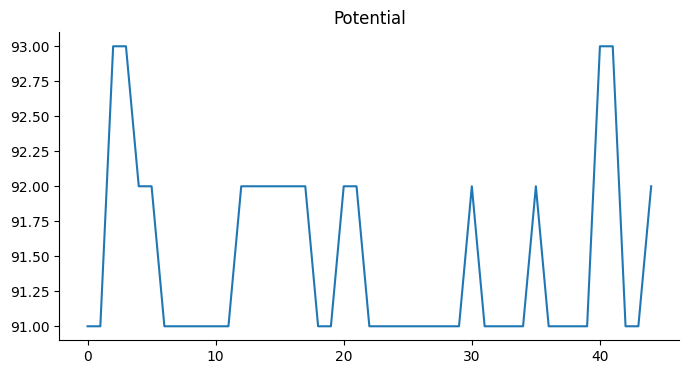

In [ ]:
from matplotlib import pyplot as plt
jugadores_potencial['Potential'].plot(kind='line', figsize=(8, 4), title='Potential')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
query = """
        WITH PuntosPorEquipo AS (
        SELECT
          home_team_api_id AS team_api_id,
        SUM(CASE
            WHEN home_team_goal > away_team_goal THEN 3
            WHEN home_team_goal = away_team_goal THEN 1
            ELSE 0
            END) AS puntos
        FROM Match
        GROUP BY home_team_api_id
        UNION ALL
        SELECT
            away_team_api_id AS team_api_id,
            SUM(CASE
                WHEN away_team_goal > home_team_goal THEN 3
                WHEN away_team_goal = home_team_goal THEN 1
                ELSE 0
                END) AS puntos
        FROM Match
        GROUP BY away_team_api_id
        )
    SELECT
        Team.team_long_name AS Equipo,
        SUM(PuntosPorEquipo.puntos) AS puntos_totales
    FROM PuntosPorEquipo
    JOIN Team ON Team.team_api_id = PuntosPorEquipo.team_api_id
    GROUP BY Equipo
    ORDER BY puntos_totales DESC
    LIMIT 15;
        """

mas_puntos = pd.read_sql(query, conn)
mas_puntos

,Equipo,puntos_totales
0,FC Barcelona,745
1,Real Madrid CF,720
2,Celtic,704
3,Manchester United,633
4,Juventus,633
5,FC Bayern Munich,623
6,FC Basel,604
7,Ajax,602
8,Paris Saint-Germain,601
9,Chelsea,598


In [ ]:
query = """
        WITH PuntosPorEquipo AS (
          SELECT
              home_team_api_id AS team_api_id,
              season,
              SUM(CASE
                  WHEN home_team_goal > away_team_goal THEN 3
                  WHEN home_team_goal = away_team_goal THEN 1
                  ELSE 0
              END) AS puntos
          FROM Match
          WHERE home_team_api_id = (SELECT team_api_id FROM Team WHERE team_long_name = 'FC Barcelona')
          GROUP BY team_api_id, season
          UNION ALL
          SELECT
              away_team_api_id AS team_api_id,
              season,
              SUM(CASE
                  WHEN away_team_goal > home_team_goal THEN 3
                  WHEN away_team_goal = home_team_goal THEN 1
                  ELSE 0
              END) AS puntos
          FROM Match
          WHERE away_team_api_id = (SELECT team_api_id FROM Team WHERE team_long_name = 'FC Barcelona')
          GROUP BY team_api_id, season
        )
      SELECT
          season,
          puntos
      FROM PuntosPorEquipo
      ORDER BY season;
        """

mas_puntos = pd.read_sql(query, conn)
mas_puntos

,season,puntos
0,2008/2009,45
1,2008/2009,42
2,2009/2010,55
3,2009/2010,44
4,2010/2011,50
5,2010/2011,46
6,2011/2012,52
7,2011/2012,39
8,2012/2013,55
9,2012/2013,45


In [ ]:
query = """
WITH PuntosPorEquipo AS (
    SELECT
        season,
        SUM(puntos) AS puntos_totales
    FROM (
        SELECT
            season,
            SUM(CASE
                WHEN home_team_api_id = (SELECT team_api_id FROM Team WHERE team_long_name = 'FC Barcelona') AND home_team_goal > away_team_goal THEN 3
                WHEN home_team_api_id = (SELECT team_api_id FROM Team WHERE team_long_name = 'FC Barcelona') AND home_team_goal = away_team_goal THEN 1
                WHEN away_team_api_id = (SELECT team_api_id FROM Team WHERE team_long_name = 'FC Barcelona') AND away_team_goal > home_team_goal THEN 3
                WHEN away_team_api_id = (SELECT team_api_id FROM Team WHERE team_long_name = 'FC Barcelona') AND away_team_goal = home_team_goal THEN 1
                ELSE 0
            END) AS puntos
        FROM Match
        WHERE home_team_api_id = (SELECT team_api_id FROM Team WHERE team_long_name = 'FC Barcelona')
           OR away_team_api_id = (SELECT team_api_id FROM Team WHERE team_long_name = 'FC Barcelona')
        GROUP BY season
    ) AS puntos_por_temporada
    GROUP BY season
)
SELECT
    season,
    puntos_totales
FROM PuntosPorEquipo
ORDER BY season;

        """

mas_puntos = pd.read_sql(query, conn)
mas_puntos

,season,puntos_totales
0,2008/2009,87
1,2009/2010,99
2,2010/2011,96
3,2011/2012,91
4,2012/2013,100
5,2013/2014,87
6,2014/2015,94
7,2015/2016,91


In [ ]:
query = """
        WITH PuntosPorEquipo AS (
    SELECT
        m.season,
        m.home_team_api_id AS team_api_id,
        SUM(CASE
            WHEN m.home_team_goal > m.away_team_goal THEN 3
            WHEN m.home_team_goal = m.away_team_goal THEN 1
            ELSE 0
        END) AS puntos
    FROM Match m
    GROUP BY m.season, m.home_team_api_id
    UNION ALL
    SELECT
        m.season,
        m.away_team_api_id AS team_api_id,
        SUM(CASE
            WHEN m.away_team_goal > m.home_team_goal THEN 3
            WHEN m.away_team_goal = m.home_team_goal THEN 1
            ELSE 0
        END) AS puntos
    FROM Match m
    GROUP BY m.season, m.away_team_api_id
      ),
      PuntosBarcelona AS (
          SELECT
              p.season,
              SUM(p.puntos) AS puntos_totales
          FROM PuntosPorEquipo p
          WHERE p.team_api_id = (SELECT t.team_api_id FROM Team t WHERE t.team_long_name = 'FC Barcelona')
          GROUP BY p.season
      ),
      MaxPuntosPorTemporada AS (
          SELECT
              mp.season,
              MAX(mp.puntos_totales) AS max_puntos
          FROM PuntosBarcelona mp
          GROUP BY mp.season
      )
      SELECT
          pb.season,
          pb.puntos_totales
      FROM PuntosBarcelona pb
      JOIN MaxPuntosPorTemporada mp ON pb.season = mp.season AND pb.puntos_totales = mp.max_puntos
      ORDER BY pb.season;
        """

max_puntos = pd.read_sql(query, conn)
max_puntos

,season,puntos_totales
0,2008/2009,87
1,2009/2010,99
2,2010/2011,96
3,2011/2012,91
4,2012/2013,100
5,2013/2014,87
6,2014/2015,94
7,2015/2016,91


In [ ]:
query = """
        With partidos_BBVA as (
        SELECT season, Home.team_long_name as home_team, home_team_goal, Away.team_long_name as away_team, away_team_goal
        FROM Match as M
        LEFT JOIN League ON M.league_id = League.id
        JOIN Team as Home ON M.home_team_api_id = Home.team_api_id
        JOIN Team as Away ON M.away_team_api_id = Away.team_api_id
        WHERE League.name = 'Spain LIGA BBVA'
        ORDER BY season)
        Select *
        FROM partidos_BBVA;
        """

# No modificar lo siguiente:
resultado = pd.read_sql(query, conn)
resultado


,season,home_team,home_team_goal,away_team,away_team_goal
0,2008/2009,Valencia CF,3,RCD Mallorca,0
1,2008/2009,CA Osasuna,1,Villarreal CF,1
2,2008/2009,RC Deportivo de La Coruña,2,Real Madrid CF,1
3,2008/2009,CD Numancia,1,FC Barcelona,0
4,2008/2009,Racing Santander,1,Sevilla FC,1
...,...,...,...,...,...
3035,2015/2016,Atlético Madrid,2,Valencia CF,1
3036,2015/2016,Málaga CF,2,RC Deportivo de La Coruña,0
3037,2015/2016,Athletic Club de Bilbao,3,Real Sporting de Gijón,0
3038,2015/2016,Granada CF,1,Real Betis Balompié,1


In [ ]:
query = """
WITH PuntosPorEquipo AS (
    SELECT
        M.season,
        Home.team_long_name AS home_team,
        SUM(CASE
            WHEN M.home_team_api_id = Home.team_api_id AND M.home_team_goal > M.away_team_goal THEN 3
            WHEN M.home_team_api_id = Home.team_api_id AND M.home_team_goal = M.away_team_goal THEN 1
            ELSE 0
        END) AS home_points,
        Away.team_long_name AS away_team,
        SUM(CASE
            WHEN M.away_team_api_id = Away.team_api_id AND M.away_team_goal > M.home_team_goal THEN 3
            WHEN M.away_team_api_id = Away.team_api_id AND M.away_team_goal = M.home_team_goal THEN 1
            ELSE 0
        END) AS away_points
    FROM Match AS M
    JOIN League ON M.league_id = League.id
    JOIN Team AS Home ON M.home_team_api_id = Home.team_api_id
    JOIN Team AS Away ON M.away_team_api_id = Away.team_api_id
    WHERE League.name = 'Spain LIGA BBVA'
    GROUP BY M.season, home_team, away_team
),
PuntosTotales AS (
    SELECT
        season,
        home_team,
        SUM(home_points) AS total_points
    FROM PuntosPorEquipo
    GROUP BY season, home_team
)
SELECT
    P.season,
    P.home_team AS champion,
    MAX(P.total_points) AS points
FROM PuntosTotales AS P
GROUP BY P.season;
"""

# No modificar lo siguiente:
nombreResultado = pd.read_sql(query, conn)
nombreResultado


,season,champion,points
0,2008/2009,FC Barcelona,45
1,2009/2010,FC Barcelona,55
2,2010/2011,FC Barcelona,50
3,2011/2012,FC Barcelona,52
4,2012/2013,FC Barcelona,55
5,2013/2014,FC Barcelona,50
6,2014/2015,Real Madrid CF,50
7,2015/2016,FC Barcelona,49


In [ ]:
query = """
    WITH MatchList as(
      SELECT
        M.season,
        Home.team_long_name AS home_team,
        SUM(CASE
            WHEN M.home_team_api_id = Home.team_api_id AND M.home_team_goal > M.away_team_goal THEN 3
            WHEN M.home_team_api_id = Home.team_api_id AND M.home_team_goal = M.away_team_goal THEN 1
            ELSE 0
        END) AS home_points,
        Away.team_long_name AS away_team,
        SUM(CASE
            WHEN M.away_team_api_id = Away.team_api_id AND M.away_team_goal > M.home_team_goal THEN 3
            WHEN M.away_team_api_id = Away.team_api_id AND M.away_team_goal = M.home_team_goal THEN 1
            ELSE 0
        END) AS away_points
    FROM Match AS M
    JOIN League ON M.league_id = League.id
    JOIN Team AS Home ON M.home_team_api_id = Home.team_api_id
    JOIN Team AS Away ON M.away_team_api_id = Away.team_api_id
    WHERE League.name = 'Spain LIGA BBVA' and season = '2015/2016'
    GROUP BY home_team, away_team),
    HomePoints AS (
      SELECT home_team AS team, SUM(home_points) AS total_home_points
      FROM MatchList
      GROUP BY home_team
      ORDER BY total_home_points DESC
    ),
    AwayPoints AS (
      SELECT away_team AS team, SUM(away_points) AS total_away_points
      FROM MatchList
      GROUP BY away_team
      ORDER BY total_away_points DESC
      )

  Select H.team, SUM(total_home_points+total_away_points) AS total_points
  FROM HomePoints as H
  INNER JOIN AwayPoints as A ON H.team = A.team
  GROUP BY H.team
  ORDER BY total_points DESC;
"""

# No modificar lo siguiente:
resultado = pd.read_sql(query, conn)
resultado


,team,total_points
0,FC Barcelona,91
1,Real Madrid CF,90
2,Atlético Madrid,88
3,Villarreal CF,64
4,Athletic Club de Bilbao,62
5,RC Celta de Vigo,60
6,Sevilla FC,52
7,Real Sociedad,48
8,Málaga CF,48
9,Real Betis Balompié,45


In [ ]:
query = """
       WITH MatchList AS (
    SELECT
        M.id,
        M.season,
        Home.team_long_name AS home_team,
        SUM(CASE
            WHEN M.home_team_api_id = Home.team_api_id AND M.home_team_goal > M.away_team_goal THEN 3
            WHEN M.home_team_api_id = Home.team_api_id AND M.home_team_goal = M.away_team_goal THEN 1
            ELSE 0
        END) AS home_points,
        Away.team_long_name AS away_team,
        SUM(CASE
            WHEN M.away_team_api_id = Away.team_api_id AND M.away_team_goal > M.home_team_goal THEN 3
            WHEN M.away_team_api_id = Away.team_api_id AND M.away_team_goal = M.home_team_goal THEN 1
            ELSE 0
        END) AS away_points
    FROM Match AS M
    JOIN League ON M.league_id = League.id
    JOIN Team AS Home ON M.home_team_api_id = Home.team_api_id
    JOIN Team AS Away ON M.away_team_api_id = Away.team_api_id
    WHERE League.name = 'Spain LIGA BBVA'
    GROUP BY M.id, M.season, home_team, away_team
),
HomePoints AS (
    SELECT season, home_team AS team, SUM(home_points) AS points
    FROM MatchList
    GROUP BY season, home_team
),
AwayPoints AS (
    SELECT season, away_team AS team, SUM(away_points) AS points
    FROM MatchList
    GROUP BY season, away_team
),
TotalPoints AS (
    SELECT season, team, SUM(points) AS total_points
    FROM (
        SELECT * FROM HomePoints
        UNION ALL
        SELECT * FROM AwayPoints
    ) AS combined_points
    GROUP BY season, team
),
Champion AS (
    SELECT season, team AS champion, total_points
    FROM (
        SELECT season, team, total_points,
               RANK() OVER (PARTITION BY season ORDER BY total_points DESC) AS rank
        FROM TotalPoints
    ) AS ranked_points
    WHERE rank = 1
),
BarcelonaPoints AS (
    SELECT season, total_points AS barcelona_points
    FROM TotalPoints
    WHERE team = 'FC Barcelona'
)
SELECT C.season, C.champion, C.total_points AS champion_points, B.barcelona_points
FROM Champion AS C
LEFT JOIN BarcelonaPoints AS B ON C.season = B.season
ORDER BY C.season;
"""

# No modificar lo siguiente:
resultado = pd.read_sql(query, conn)
resultado


,season,champion,champion_points,barcelona_points
0,2008/2009,FC Barcelona,87,87
1,2009/2010,FC Barcelona,99,99
2,2010/2011,FC Barcelona,96,96
3,2011/2012,Real Madrid CF,100,91
4,2012/2013,FC Barcelona,100,100
5,2013/2014,Atlético Madrid,90,87
6,2014/2015,FC Barcelona,94,94
7,2015/2016,FC Barcelona,91,91


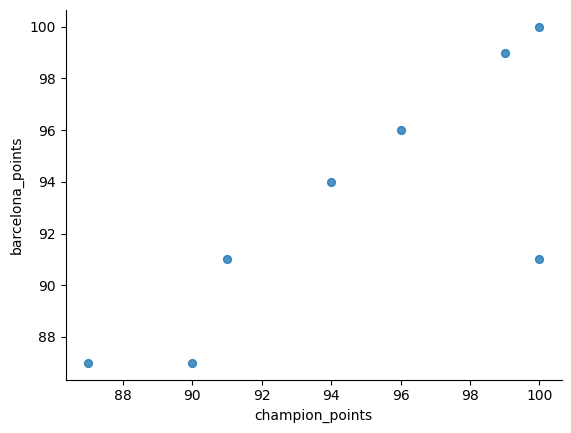

In [ ]:
# @title champion_points vs barcelona_points

from matplotlib import pyplot as plt
resultado.plot(kind='scatter', x='champion_points', y='barcelona_points', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)